#Boosting - Theory

## 1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to create a strong predictive model. It sequentially trains models, giving more focus to misclassified samples.

## 2. How does Boosting differ from Bagging?
- **Bagging**: Trains multiple models independently in parallel and combines their results.
- **Boosting**: Trains models sequentially, where each model corrects errors from the previous one.

## 3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns weights to data points and iteratively adjusts them based on previous errors, making misclassified samples more important in subsequent models.

## 4. Explain the working of AdaBoost with an example.
1. Initialize equal weights to all samples.
2. Train a weak learner (e.g., Decision Tree).
3. Calculate error and adjust sample weights (misclassified points get higher weights).
4. Train another weak learner on adjusted weights.
5. Combine all weak learners to form a strong classifier.

## 5. What is Gradient Boosting, and how is it different from AdaBoost?
- **Gradient Boosting** minimizes errors by optimizing a differentiable loss function (gradient descent).
- **AdaBoost** assigns higher weights to misclassified samples instead of optimizing a loss function.

## 6. What is the loss function in Gradient Boosting?
Gradient Boosting uses Mean Squared Error (MSE) for regression and Log Loss for classification.

## 7. How does XGBoost improve over traditional Gradient Boosting?
XGBoost introduces:
- Regularization (L1 & L2)
- Parallel processing
- Tree pruning (reduces overfitting)
- Handling of missing values

## 8. What is the difference between XGBoost and CatBoost?
- **XGBoost**: Optimized for structured/tabular data.
- **CatBoost**: Handles categorical features efficiently without requiring one-hot encoding.

## 9. What are some real-world applications of Boosting techniques?
- Fraud detection (XGBoost in finance)
- Recommendation systems
- Medical diagnosis (Gradient Boosting)
- NLP sentiment analysis (CatBoost)

## 10. How does regularization help in XGBoost?
Regularization prevents overfitting by adding penalties (L1 & L2) to the loss function, making the model generalize better.

## 11. What are some hyperparameters to tune in Gradient Boosting models?
- Learning rate (`eta`)
- Number of estimators (`n_estimators`)
- Depth of trees (`max_depth`)
- Subsampling (`subsample`)

## 12. What is the concept of Feature Importance in Boosting?
Boosting models rank feature importance based on how often they are used for splits, helping in feature selection.

## 13. Why is CatBoost efficient for categorical data?
CatBoost uses an efficient encoding technique called **Ordered Boosting**, which preserves the natural order of categorical features, avoiding overfitting.

#Boosting - Practical

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, f1_score, log_loss, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier

In [4]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Accuracy: 0.85


In [5]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ada_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)
print("AdaBoost Regressor MAE:", mean_absolute_error(y_test, y_pred))

AdaBoost Regressor MAE: 46.78424116785141


In [6]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(X_train, y_train)

feature_importance = pd.DataFrame({'Feature': data.feature_names, 'Importance': gb_clf.feature_importances_})
print("Feature Importance:\n", feature_importance.sort_values(by='Importance', ascending=False))

Feature Importance:
                     Feature  Importance
7       mean concave points    0.452175
27     worst concave points    0.240937
20             worst radius    0.075443
22          worst perimeter    0.050918
21            worst texture    0.039726
23               worst area    0.038279
1              mean texture    0.027790
26          worst concavity    0.018725
16          concavity error    0.012845
13               area error    0.008338
10             radius error    0.006783
24         worst smoothness    0.004643
19  fractal dimension error    0.004215
11            texture error    0.003553
5          mean compactness    0.002788
4           mean smoothness    0.002470
15        compactness error    0.002419
17     concave points error    0.002036
28           worst symmetry    0.001345
12          perimeter error    0.001117
6            mean concavity    0.000926
18           symmetry error    0.000700
8             mean symmetry    0.000504
14         smoothne

In [9]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
print("Gradient Boosting Regressor R-Squared Score:", gb_reg.score(X_test, y_test))

Gradient Boosting Regressor R-Squared Score: 0.8668771266919799


In [26]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
xgb_clf = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)  # Removed use_label_encoder=False
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_clf.predict(X_test)))

XGBoost Classifier Accuracy: 0.956140350877193
Gradient Boosting Classifier Accuracy: 0.956140350877193


In [8]:
# 19. Train a CatBoost Classifier and evaluate using F1-Score
cat_clf = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)

print("CatBoost Classifier F1-Score:", f1_score(y_test, y_pred_cat))

CatBoost Classifier F1-Score: 0.9790209790209791


In [11]:
# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test)

print("XGBoost Regressor MSE:", mean_squared_error(y_test, y_pred_xgb_reg))

XGBoost Regressor MSE: 0.04869866371154785


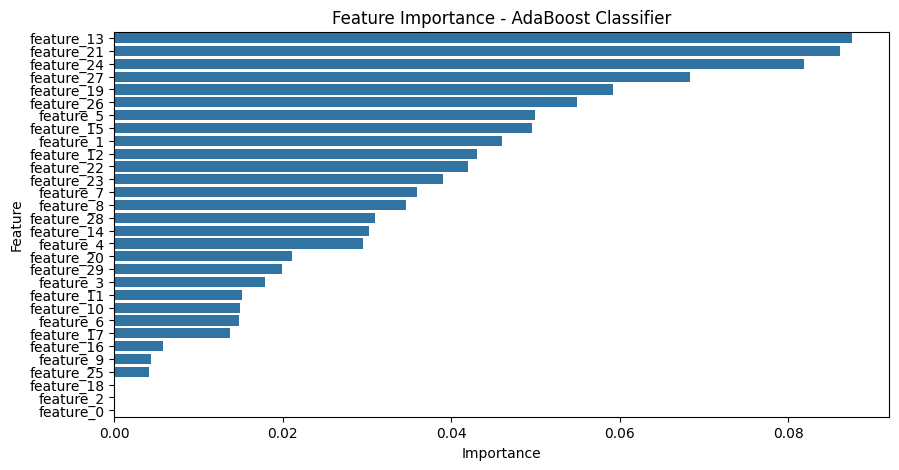

In [18]:
# 21. Train an AdaBoost Classifier and visualize feature importance

ada_clf.fit(X, y)

feature_names = [f'feature_{i}' for i in range(X.shape[1])]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': ada_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - AdaBoost Classifier")
plt.show()

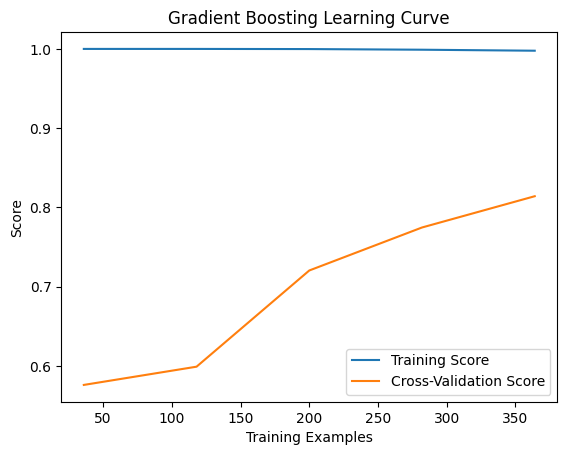

In [13]:
# 22. Train a Gradient Boosting Regressor and plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gb_reg, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Gradient Boosting Learning Curve")
plt.legend()
plt.show()

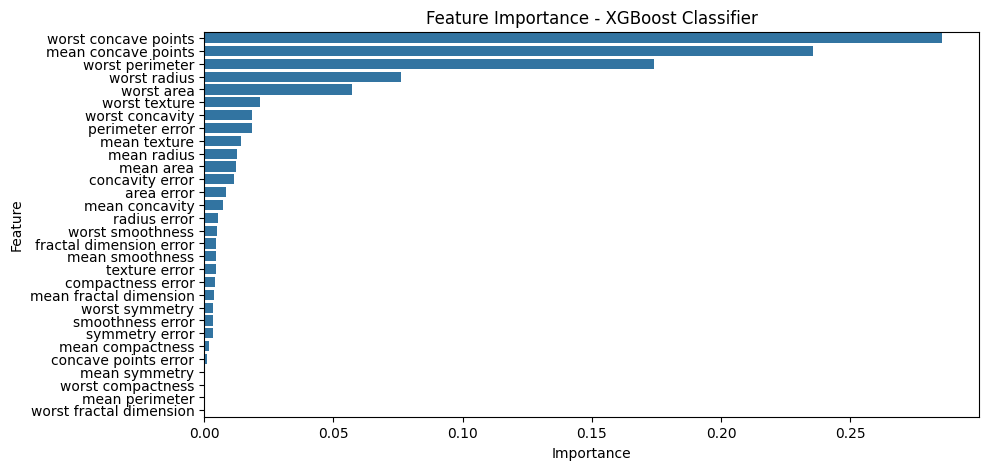

In [14]:
# 23. Train an XGBoost Classifier and visualize feature importance
xgb_importance = pd.DataFrame({'Feature': data.feature_names, 'Importance': xgb_clf.feature_importances_})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=xgb_importance)
plt.title("Feature Importance - XGBoost Classifier")
plt.show()

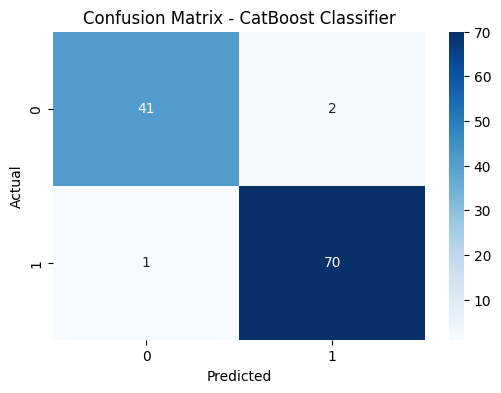

In [16]:
# 24. Train a CatBoost Classifier and plot the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_cat = cat_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

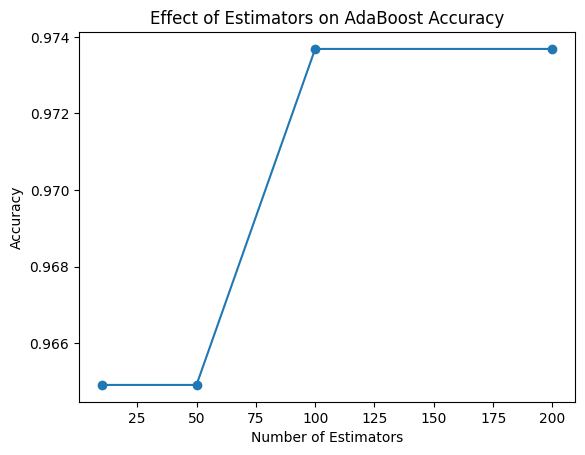

In [17]:
# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
estimators = [10, 50, 100, 200]
accuracy_scores = []

for n in estimators:
    ada_clf = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_ada = ada_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_ada)
    accuracy_scores.append(acc)

plt.plot(estimators, accuracy_scores, marker="o")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Effect of Estimators on AdaBoost Accuracy")
plt.show()

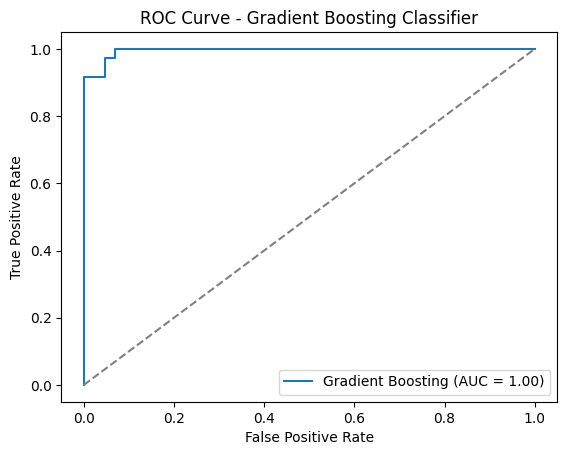

In [19]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.metrics import roc_curve, auc

y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend()
plt.show()

In [20]:
# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid_search = GridSearchCV(XGBRegressor(n_estimators=100, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Learning Rate for XGBoost Regressor:", grid_search.best_params_['learning_rate'])

Best Learning Rate for XGBoost Regressor: 0.3


In [21]:
# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
cat_clf_balanced = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, class_weights=[1, 5], verbose=0)
cat_clf_balanced.fit(X_train, y_train)
y_pred_cat_balanced = cat_clf_balanced.predict(X_test)

print("CatBoost Classifier F1-Score (Balanced Classes):", f1_score(y_test, y_pred_cat_balanced))

CatBoost Classifier F1-Score (Balanced Classes): 0.9722222222222222


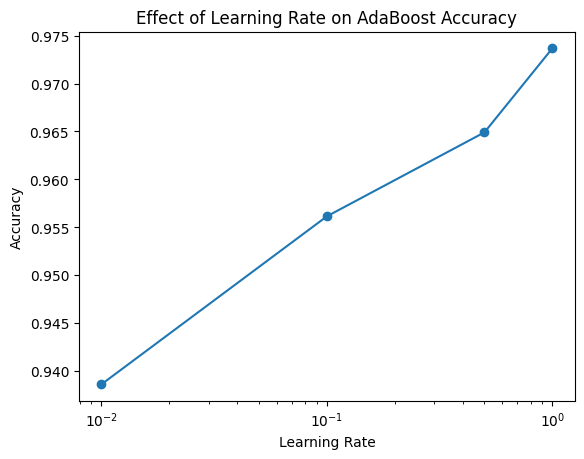

In [22]:
# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.0]
accuracy_scores = []

for lr in learning_rates:
    ada_clf = AdaBoostClassifier(learning_rate=lr, n_estimators=100, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_ada = ada_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_ada)
    accuracy_scores.append(acc)

plt.plot(learning_rates, accuracy_scores, marker="o")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xscale("log")
plt.show()

In [25]:
# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

xgb_multi = XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42)
xgb_multi.fit(X_train, y_train)
y_prob_xgb = xgb_multi.predict_proba(X_test)

log_loss_score = log_loss(y_test, y_prob_xgb)
print("XGBoost Multi-class Log Loss:", log_loss_score)

XGBoost Multi-class Log Loss: 0.12201097351759238
